# Video Game Sales

`vgsales.csv` 파일을 읽어 데이터프레임 객체로 변환한 후 아래 문제들을 해결해보시오.

---
### Ref.
https://www.kaggle.com/code/upadorprofzs/eda-video-game-sales/

---

문제 1. 데이터 구조 파악
- 데이터의 행 수, 열 수를 출력하시오.
- 결측치가 있는 컬럼을 찾아 개수를 함께 출력하시오.

In [204]:
import pandas as pd

df = pd.read_csv('vgsales.csv')

# 데이터 행 수, 열 수
print(f'행 수: {df.shape[0]}')
print(f'열 수: {df.shape[1]}')
print(f'행 정보: {df.index}')
print(f'열 정보: {df.columns}')

# 결측치
print(f'결측치: \n{df.isnull().sum()}')

행 수: 16598
열 수: 11
행 정보: RangeIndex(start=0, stop=16598, step=1)
열 정보: Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')
결측치: 
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


문제 2. 연도 (Year) 컬럼 정리
- Year 컬럼의 최소값, 최대값, 가장 많이 등장하는 연도를 각각 구하시오.
- 출시 연도가 없는 데이터를 제거한 새로운 데이터 프레임을 만드시오.

In [ ]:
# 최소값
print(f'최소값: {int(df["Year"].min())}')

# 최대값
print(f'최대값: {int(df["Year"].max())}')

# 최빈값
print(f'최빈값: {int(df["Year"].mode()[0])}')

# 출시 연도가 없는 데이터 제거
df = df.dropna(subset=['Year'])
print(f'결측치: {df["Year"].isnull().sum()}')


최소값: 1980
최대값: 2020
최빈값: 2009
0


문제 3. 주요 컬럼의 고유값 탐색
- Platform, Genre, Publisher 각각 어떤 값들이 있는 지 고유값 목록을 출력하시오.
- Genre는 총 몇 종류인지 구하시오.

In [70]:
# 고유값 목록
print(f'Platform: \n{df["Platform"].unique()}')
print()
print(f'Genre: \n{df["Genre"].unique()}')
print()
print(f'Publisher: \n{df["Publisher"].unique()}')

# Genre 종류
print(f'Genre 종류 수: \n{df["Genre"].nunique()}')



Platform: 
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

Genre: 
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']

Publisher: 
['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital Entertainment'
 'Sony Computer Entertainment Europe' 'Square Enix' 'LucasArts'
 'Virgin Interactive' 'Warner Bros. Interactive Entertainment'
 'Universal Interactive' 'Eidos Interactive' 'RedOctane' 'Vivendi Games'
 'Enix Corporation' 'Namco Bandai Games' 'Palcom' 'Hasbro Interactive'
 'THQ' 'Fox Interactive' 'Acclaim Entertainment' 'MTV Games'
 'Disney Interactive Studios' nan 'Majesco Entertainment' 'Codemast

문제 4. 연도별 게임 출시 수
- 연도별 게임 출시 갯수를 구하고, 연도 오름차순으로 정렬하시오.
- 위 데이터를 선 그래프로 시각화하시오.

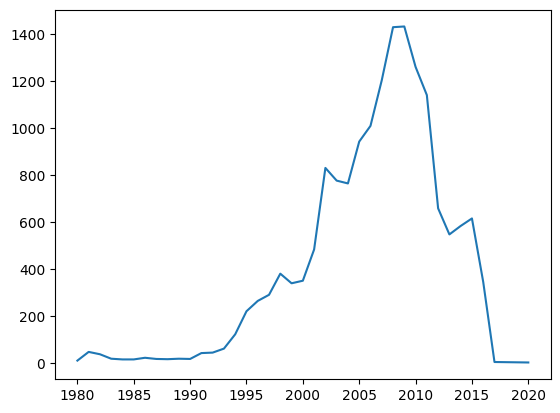

In [81]:
import matplotlib.pyplot as plt
df_year_games = df.groupby('Year')['Name'].count()
df_year_games
plt.plot(
  df_year_games.index,
  df_year_games.values,
)

문제 5. 플랫폼별 전 세계 판매량
- 플랫폼(Platform) 별로 Global_Sales를 합산하고, 판매량이 높은 순으로 TOP 10을 막대그래프로 시각화하시오.

Text(0, 0.5, 'Sales')

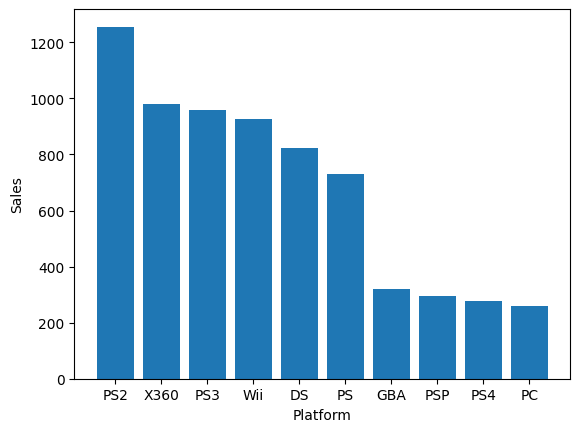

In [80]:
platform_global_sale = df.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=False).head(10)
platform_global_sale

plt.bar(
  platform_global_sale.index,
  platform_global_sale.values,
)
plt.xlabel('Platform')
plt.ylabel('Sales')

문제 6. 가장 많이 판매된 장르
- 장르별 Global_Sales 총합을 구해 가장 높은 장르를 찾으시오.
- 장르별 판매 비중을 파이차트로 시각화하시오.

가장 매출 높은 장르: Action
매출: 1751.18


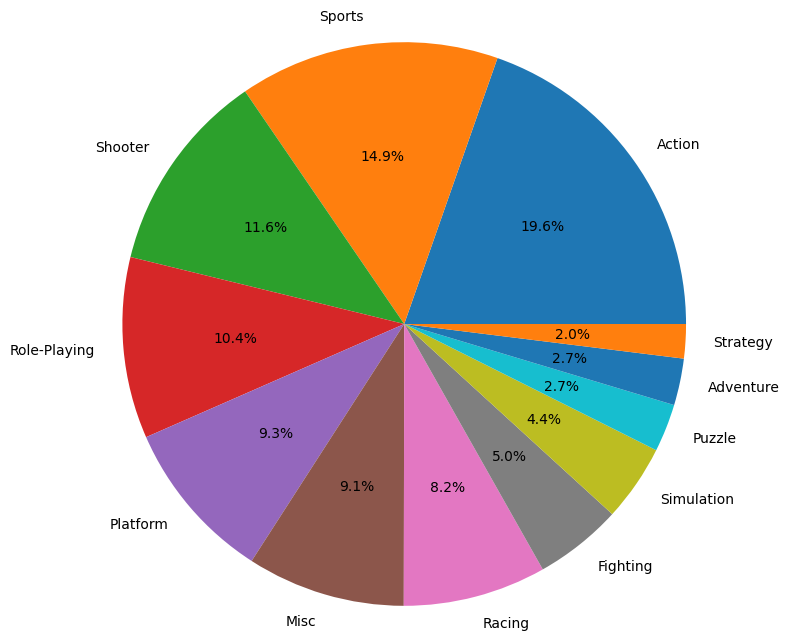

In [114]:
# 가장 높은 장르
genre_gbsales = df.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False)
print(f'가장 매출 높은 장르: {genre_gbsales.index[0]}')
print(f'매출: {genre_gbsales.values[0]}')

# 파이차트
plt.figure(figsize=(8, 8))
plt.pie(
  genre_gbsales,
  labels=genre_gbsales.index,
  autopct='%1.1f%%',
)
plt.axis('equal')
plt.show()

문제 7. Publisher 별 평균 판매량
- Publisher 별 평균 Global_Sales를 구하고, 상위 10개만 출력하시오.

In [118]:
publisher_gbsales = df.groupby('Publisher')['Global_Sales'].mean().sort_values(ascending=False)
publisher_gbsales.head(10)

Publisher
Palcom                                4.170000
Red Orb                               2.620000
Nintendo                              2.541337
Arena Entertainment                   2.360000
UEP Systems                           2.250000
RedOctane                             2.170000
Valve                                 1.740000
Hello Games                           1.600000
Sony Computer Entertainment Europe    1.592667
Westwood Studios                      1.550000
Name: Global_Sales, dtype: float64

문제 8. 특정 Publisher 집중 분석
- `Nintendo` 또는 `Electronic Arts` 중 하나를 선택하여, 연도별 Global_Sales 추세를 선 그래프로 나타내시오.

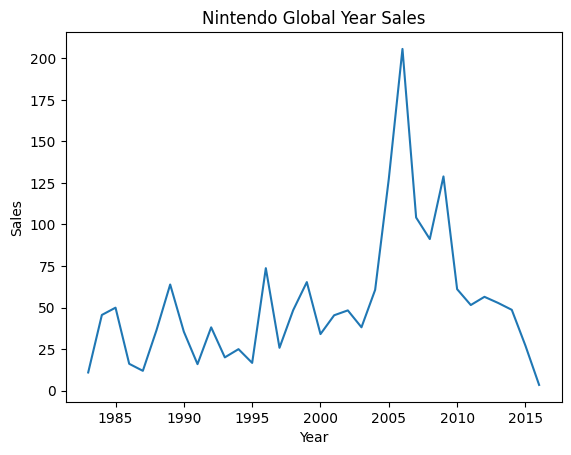

In [127]:
df_nintendo = df[df['Publisher'] == 'Nintendo']

nintendo_yearsale = df_nintendo.groupby('Year')['Global_Sales'].sum()

plt.plot(
  nintendo_yearsale.index,
  nintendo_yearsale.values,
)

plt.title('Nintendo Global Year Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

문제 9. Publisher 별 가장 많이 발매한 장르
- 각 Publisher가 가장 많이 만든 장르는 무엇인지 구하시오. (Publisher 별로 Genre count의 최대값 찾기)

[hint]
`groupby(['Publisher', 'Genre']).size().reset_index()`

In [ ]:
publisher_genre = df.groupby(['Publisher', 'Genre']).size().reset_index(name='count')

publisher_genre.loc[publisher_genre.groupby('Publisher')['count'].idxmax()]


,Publisher,Genre,count
0,10TACLE Studios,Adventure,1
3,1C Company,Racing,1
6,20th Century Fox Video Games,Action,4
8,2D Boy,Puzzle,1
9,3DO,Action,17
...,...,...,...
1819,id Software,Shooter,1
1820,imageepoch Inc.,Adventure,1
1822,inXile Entertainment,Role-Playing,1
1823,"mixi, Inc",Action,1


문제 10. 지역별 판매량 비교
- NA_Sales, EU_Sales, JP_Sales, Other_Sales 전 세계 합을 비교하여 그래프로 표현하시오.

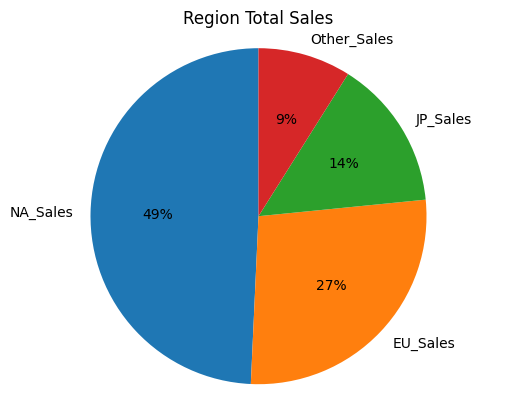

In [165]:
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
region_sales
plt.pie(
  region_sales,
  labels=region_sales.index,
  startangle=90,
  autopct='%1.f%%'
)
plt.title('Region Total Sales')
plt.axis('equal')
plt.show()

문제 11. 국가별로 인기 있는 장르
- NA / EU / JP 각각 판매량이 가장 높은 장르를 구하시오.

In [181]:
genre_sales = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales']].sum()
genre_sales['NA_Sales'].sort_values(ascending=False)

Genre
Action          877.83
Sports          683.35
Shooter         582.60
Platform        447.05
Misc            410.24
Racing          359.42
Role-Playing    327.28
Fighting        223.59
Simulation      183.31
Puzzle          123.78
Adventure       105.80
Strategy         68.70
Name: NA_Sales, dtype: float64

문제 12. 연도 + 장르 + 플랫폼 종합 분석
- 특정 장르를 선택하여 
    - 연도별 출시 수
    - 플랫폼별 판매량 TOP5 
    를 각각 그래프로 시각화 하시오
- 결과를 확인하여 해당 장르의 트렌드를 3문장으로 정리하시오.

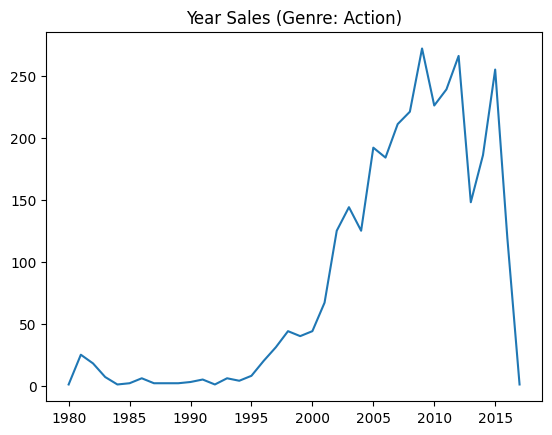

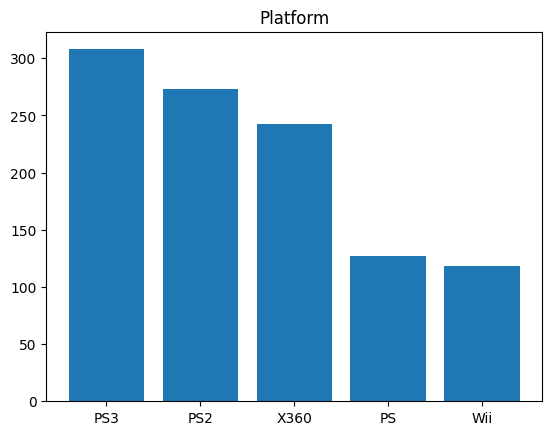

In [ ]:
df_action = df[df['Genre'] == 'Action']
action_year = df_action.groupby('Year')['Name'].count()

plt.plot(
  action_year.index,
  action_year.values,
)
plt.title('Year Sales (Genre: Action)')
plt.show()

platform_sales = df_action.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(5)
plt.bar(
  platform_sales.index,
  platform_sales.values,
  
)
plt.title('Platform Sales Top5(Genre: Action)')
plt.show()

